# Тестовое задание в TUTU.ru, Швецова М.Д.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Мария/Downloads/ha_data.csv", sep=";")
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


Посмотрим, каких действий сколько

In [3]:
events = df["title"].value_counts()
events

banner_show     7393319
banner_click     829185
order            248722
Name: title, dtype: int64

Посмотрим, какой товар рекламиовался больше

In [4]:
poster = df[df["title"] == "banner_show"]
poster = poster["product"].value_counts().to_frame()
poster

,product
company,1580238
sports_nutrition,1465970
clothes,1453128
sneakers,1453029
accessories,1440954


In [5]:
poster["product"].astype(int)

company             1580238
sports_nutrition    1465970
clothes             1453128
sneakers            1453029
accessories         1440954
Name: product, dtype: int32

(-1.1118834921298268,
 1.1005658805776108,
 -1.1210389629642945,
 1.1234556814681087)

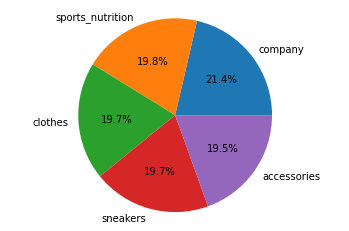

In [6]:
vals = poster["product"]
labels = poster.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")

Как видно по диаграмме, на баннере все виды товаров рекламировались примерно в одинаковом количестве

Посмотрим, на что больше кликали

                  product
clothes            220595
sneakers           182597
sports_nutrition   144918
company            144821
accessories        136254


(-1.1127684882479927,
 1.1006080232499045,
 -1.1023965946393381,
 1.1095333712328979)

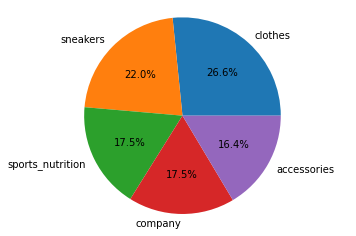

In [7]:
clicks = df[df["title"] == "banner_click"]
clicks = clicks["product"].value_counts().to_frame()
print(clicks)

vals = clicks["product"]
labels = clicks.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")

Здесь уже разница более ощутима: количество кликов на clothes заметно выше количества кликов на остальные разделы company - показов больше всего, однако по кликам на пердпоследнем месте

Посмотрим, что чаще покупали

                  product
clothes            112715
sneakers            67719
accessories         44551
sports_nutrition    23737


(-1.1106565278237575,
 1.1005074537058932,
 -1.1192095043207841,
 1.1264155093560158)

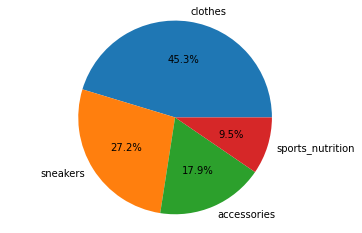

In [8]:
bought = df[df["title"] == "order"]
bought = bought["product"].value_counts().to_frame()
print(bought)

vals = bought["product"]
labels = bought.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")

Разница в объеме покупок в различных категориях очень заметна, цифры могут это подтвердить
можно ли сделать вывод, что от количества кликов на баннер слабо зависит, купит ли пользователь товар, ведь если посмотреть на соотношение числа кликов, оно отличается гораздо менее сильно, чем соотношение покупок?

Вывод делать еще рано. Поскольку нам известно время каждого из действий, есть возможность посмотреть, как во времени распределено число каждого из действий. От схожести распределений будет зависеть, возможна ли корреляция между ними. Построим несколько боксплотов для наглядности

In [11]:
df["seconds"] = df['time'].map(lambda x: (datetime.strptime(x, "%Y-%m-%d %H:%M:%S") - datetime(1970, 1, 1)).total_seconds())
df

,order_id,page_id,product,site_version,time,title,user,seconds
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0,1.486672e+09
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0,1.486462e+09
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1,1.485695e+09
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1,1.492012e+09
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1,1.485695e+09
...,...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616,1.495548e+09
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617,1.495959e+09
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618,1.495272e+09
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619,1.496000e+09


In [12]:
df["daytime"] = df['time'].map(lambda x: (datetime.strptime(x.split()[1], "%H:%M:%S") - datetime(1970, 1, 1)).total_seconds())
df

,order_id,page_id,product,site_version,time,title,user,seconds,daytime
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0,1.486672e+09,-2.208915e+09
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0,1.486462e+09,-2.208953e+09
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1,1.485695e+09,-2.208942e+09
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1,1.492012e+09,-2.208932e+09
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1,1.485695e+09,-2.208942e+09
...,...,...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616,1.495548e+09,-2.208938e+09
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617,1.495959e+09,-2.208959e+09
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618,1.495272e+09,-2.208955e+09
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619,1.496000e+09,-2.208919e+09


C:\Users\Мария\AppData\Local\Temp\ipykernel_9336\2942295996.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.repeat(["banner_show", "order", "banner_click"], 1), rotation=0, fontsize=12)


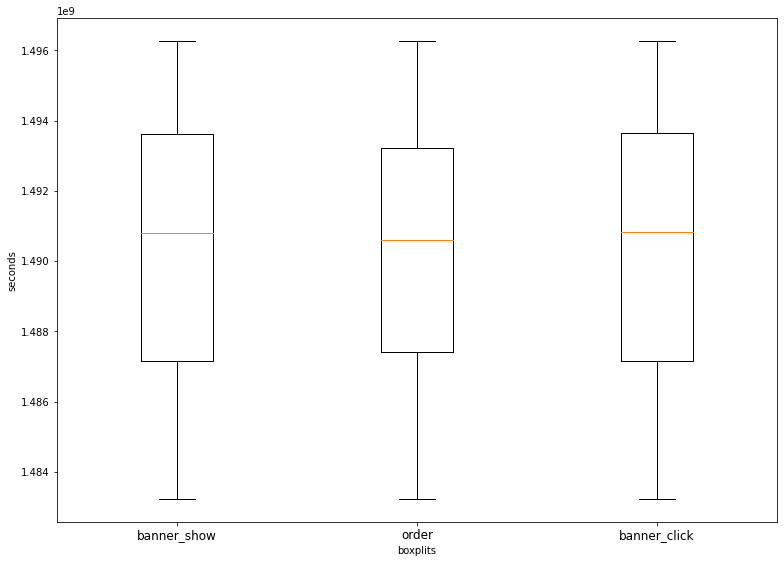

In [13]:
df_show = df.loc[df["title"] == "banner_show"]
df_order = df.loc[df["title"] == "order"]
df_click = df.loc[df["title"] == "banner_click"]

data = [df_show["seconds"], df_order["seconds"], df_click["seconds"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(np.repeat(["banner_show", "order", "banner_click"], 1), rotation=0, fontsize=12)

# Creating plot
bp = ax.boxplot(data)

plt.xlabel("boxplits")
plt.ylabel("seconds")

# show plot
plt.show()

Все три графика схожи между собой, а графики числа показов баннера и числа кликов и вовсе совпадают. Интересно, что медиана графика заказов чуть ниже медиан других графиков

Видно, что действия выполнялись в один и тот же период, также можно отметить, что между числом кликов и числом показов есть прямая корреляция. Боксплот для числа заказов отличается от остальных графиков.

Посмотрим на зависимость числа показов, заказов и кликов от времени дня

In [14]:
df.sort_values(axis = 0, by="daytime")

,order_id,page_id,product,site_version,time,title,user,seconds,daytime
16138,NaN,23473.0,sports_nutrition,mobile,2017-02-02 00:00:00,banner_show,user_5555,1.485994e+09,-2.208989e+09
6436824,130063.0,NaN,clothes,mobile,2017-05-03 00:00:00,order,user_3070982,1.493770e+09,-2.208989e+09
2157609,NaN,4866077.0,sports_nutrition,mobile,2017-02-08 00:00:00,banner_show,user_935754,1.486512e+09,-2.208989e+09
4955581,484029.0,NaN,clothes,desktop,2017-04-04 00:00:00,order,user_2319072,1.491264e+09,-2.208989e+09
6062338,NaN,16158459.0,clothes,mobile,2017-04-17 00:00:00,banner_show,user_2868268,1.492387e+09,-2.208989e+09
...,...,...,...,...,...,...,...,...,...
834692,NaN,20384410.0,sneakers,mobile,2017-05-18 23:59:59,banner_show,user_333364,1.495152e+09,-2.208902e+09
5661634,NaN,14952030.0,sports_nutrition,mobile,2017-04-30 23:59:59,banner_show,user_2662392,1.493597e+09,-2.208902e+09
5872062,NaN,15591158.0,sports_nutrition,desktop,2017-05-01 23:59:59,banner_show,user_2769134,1.493683e+09,-2.208902e+09
190392,NaN,18877041.0,sneakers,mobile,2017-04-04 23:59:59,banner_show,user_72401,1.491350e+09,-2.208902e+09


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


Text(0, 0.5, 'number of actions')

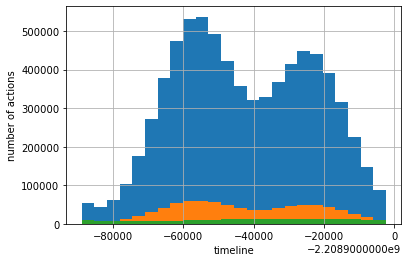

In [15]:
df['daytime'].astype(int)

h = df_show['daytime'].hist(bins = 24)

h = df_click['daytime'].hist(bins = 24)

h = df_order['daytime'].hist(bins = 24)

plt.xlabel("timeline")
plt.ylabel("number of actions")

Здесь за график числа показов отвечает синий цвет, за график числа кликов - оранжевый, за график покупок - зеленый. Видим, что прямой корреляции между заказами и показами/кликами нет: пик числа показов и числа кликов не совпадает с пиком числа заказов. Но нам-то важно не то, сколько накликали, а то, как после этого купили

Попробуем просторить гистограммы для числа кликов, числа заказов и числа показов баннера в зависимости от полного времени

In [16]:
df.sort_values(axis = 0, by="seconds")

,order_id,page_id,product,site_version,time,title,user,seconds,daytime
2989252,NaN,7446868.0,accessories,desktop,2017-01-01 00:00:03,banner_show,user_1365850,1.483229e+09,-2.208989e+09
2407919,NaN,5639042.0,accessories,mobile,2017-01-01 00:00:05,banner_show,user_1064565,1.483229e+09,-2.208989e+09
2595058,NaN,7310704.0,clothes,desktop,2017-01-01 00:00:15,banner_show,user_1162467,1.483229e+09,-2.208989e+09
1764739,NaN,3745903.0,sneakers,mobile,2017-01-01 00:00:25,banner_show,user_742569,1.483229e+09,-2.208989e+09
3918929,NaN,10200275.0,company,desktop,2017-01-01 00:00:25,banner_show,user_1827807,1.483229e+09,-2.208989e+09
...,...,...,...,...,...,...,...,...,...
8151182,NaN,23601866.0,company,mobile,2017-05-31 23:59:37,banner_show,user_4047676,1.496275e+09,-2.208902e+09
8165105,NaN,23658876.0,clothes,desktop,2017-05-31 23:59:40,banner_show,user_4056326,1.496275e+09,-2.208902e+09
8363442,NaN,24446787.0,sports_nutrition,mobile,2017-05-31 23:59:51,banner_click,user_4182938,1.496275e+09,-2.208902e+09
7808442,NaN,22326691.0,clothes,mobile,2017-05-31 23:59:53,banner_show,user_3843064,1.496275e+09,-2.208902e+09


После сортировки значений по времени можно заметить, что наблюдения проводились с 2017-01-10 по 2017-05-31, то есть практически ровно 5 месяцев. Судя по календарю за 2017 год, этот период равен 21 неделе и 4 дням. Построим же гистограмму с 22 столбцами - столбец будет отвечать за число действий в неделю. Посмотрим, какие выводы на ее основе можно сделать

Text(0, 0.5, 'number of actions')

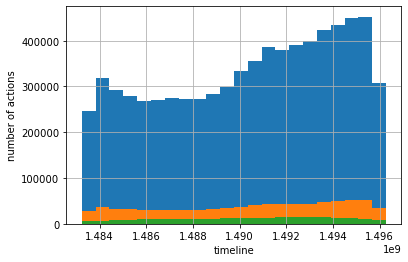

In [17]:
df['seconds'].astype(int)

h = df_show['seconds'].hist(bins = 22)

h = df_click['seconds'].hist(bins = 22)

h = df_order['seconds'].hist(bins = 22)

plt.xlabel("timeline")
plt.ylabel("number of actions")

Чтобы лучше всё разглядеть, увеличим график

Text(0, 0.5, 'number of actions')

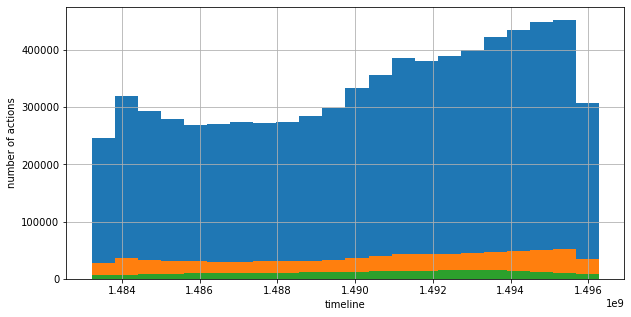

In [18]:
plt.figure(figsize=(10, 5))

h = df_show['seconds'].hist(bins = 22)
h = df_click['seconds'].hist(bins = 22)
h = df_order['seconds'].hist(bins = 22)

plt.xlabel("timeline")
plt.ylabel("number of actions")

Здесь за график числа показов отвечает синий цвет, за график числа кликов - оранжевый, за график покупок - зеленый
Можно видеть, что графики показов и кликов похожи:
    практически везде где возрастает один, возрастает и другой;
    где один убывает, другой также убывает
А вот с покупками ситуация иная:
    в точке 6.3620 график покупок начинает возрастать, когда другие два убывают;
    в точке 6.3630 график покупок убывает, когда другие два заметно возрастают

А что если корреляция есть для одного из товаров? Тогда место для баннера можно не продавать, а оставить и отображать на баннере только напрямую коррелирующий товар. Проверим эту гипотезу. Смотрим, опять же, по зависимости время дня - показ, клик, заказ

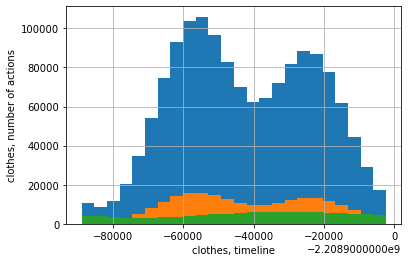

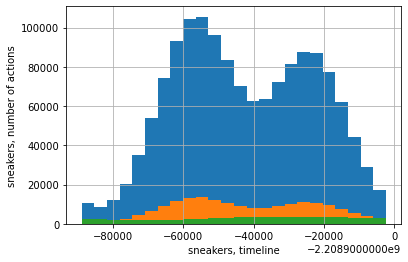

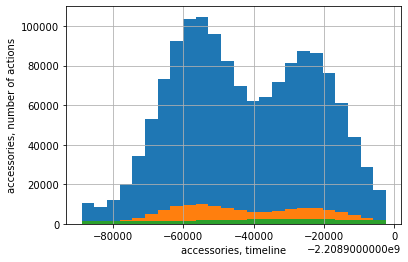

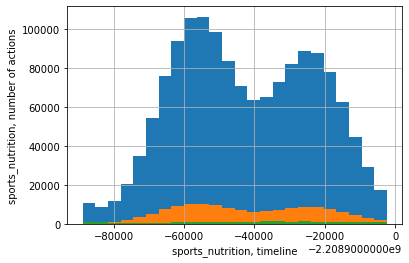

In [22]:
prod_type = ['clothes', 'sneakers', 'accessories', 'sports_nutrition']

for prod in prod_type:
    df_curr_show = df_show.loc[df_show["product"] == prod]
    df_curr_order = df_order.loc[df_order["product"] == prod]
    df_curr_click = df_click.loc[df_click["product"] == prod]
    
    h = df_curr_show['daytime'].hist(bins = 24)
    h = df_curr_click['daytime'].hist(bins = 24)
    h = df_curr_order['daytime'].hist(bins = 24)

    plt.xlabel("{}, timeline".format(prod))
    plt.ylabel("{}, number of actions".format(prod))
    
    plt.show()
    

Прямой корреляции числа заказов с числом показов/кликов мы не видим ни для одного товара, можно лишь заметить, что число покупок коррелирует со временем дня - каждый из товаров активнее всего покупается в одном временном диапазоне. Также можно заметить, что при примерно одинаковом числе кликов и показов, одежду покупают в разы чаще, чем другие виды товаров

На основании всего вышеперечисленного считаю, что продать место баннера можно:
    кликать на него будут, ведь число кликов зависит от числа показов - мы видим это на гистограммах;
    мы не потеряем наши заказы, так как число заказов не коррелирует напрямую с числом кликов - при пике показов и кликов, пика числа заказов мы не видим